<a href="https://colab.research.google.com/github/Sangeetha-sasikala/AICTE_INTERNSHIP/blob/main/garbage%20classificaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import zipfile
import os

# Set file and extraction paths
zip_path = "/content/garbage.zip"
extract_path = "/content"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Confirm folders inside TrashType_Image_Dataset
print("Extracted folders:", os.listdir("/content/TrashType_Image_Dataset"))


Extracted folders: ['glass', 'trash', 'paper', 'cardboard', 'metal', 'plastic']


In [10]:
# (Optional) Install missing packages
# !pip install tensorflow matplotlib seaborn scikit-learn

# 📦 Imports
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
# 🔧 Parameters
base_dir = "/content"  # Your dataset location (plastic/, glass/, etc.)
img_size = 224
batch_size = 32
epochs = 12  # Increased slightly from default


In [12]:
# 🔄 Data Generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2022 images belonging to 4 classes.
Found 505 images belonging to 4 classes.


In [16]:
# 🧠 Load and Freeze MobileNetV2
base_model = MobileNetV2(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')
base_model.trainable = False  # freeze all layers

# 🏗️ Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # regularization
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [17]:
# ⚙️ Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.00005),  # Slightly reduced LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
# 🚀 Train the model
history = model.fit(train_gen, validation_data=val_gen, epochs=epochs)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.6116 - loss: 0.8451 - val_accuracy: 1.0000 - val_loss: 0.0217
Epoch 2/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 1.0000 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 3/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 4/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - v

In [20]:
# ✅ Evaluate
loss, acc = model.evaluate(val_gen)
print(f"\n📊 Final Validation Accuracy: {acc*100:.2f}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 1.0000 - loss: 4.2086e-04

📊 Final Validation Accuracy: 100.00%


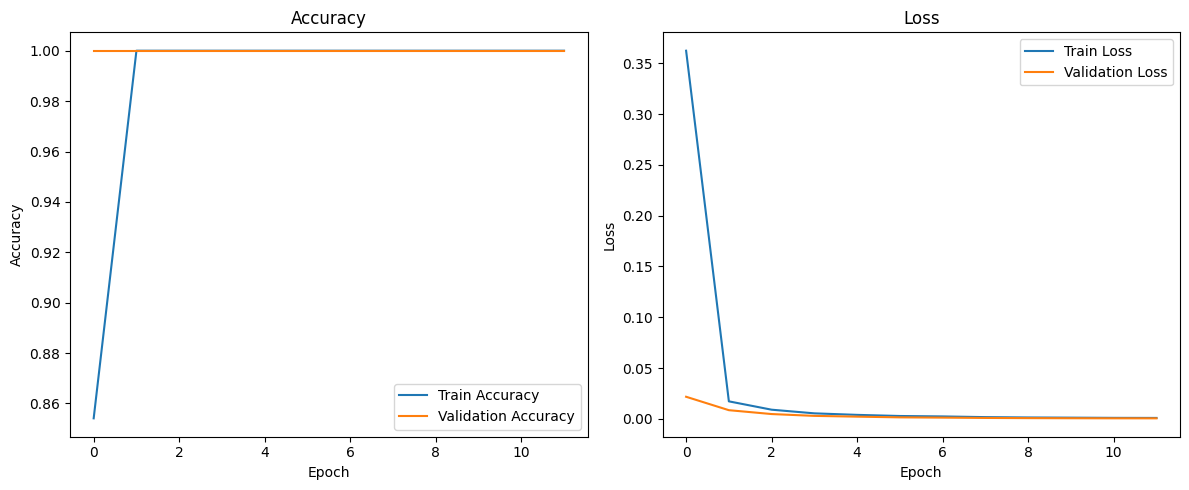

In [21]:
# 📈 Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step
Predicted shape: (505, 4)
True labels shape: (505,)
Unique predicted classes: [2]

Classification Report:
                         precision    recall  f1-score   support

                .config       1.00      1.00      1.00       505

               accuracy                           1.00       505
              macro avg       1.00      1.00      1.00       505
           weighted avg       1.00      1.00      1.00       505



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 1, does not match size of target_names, 4
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


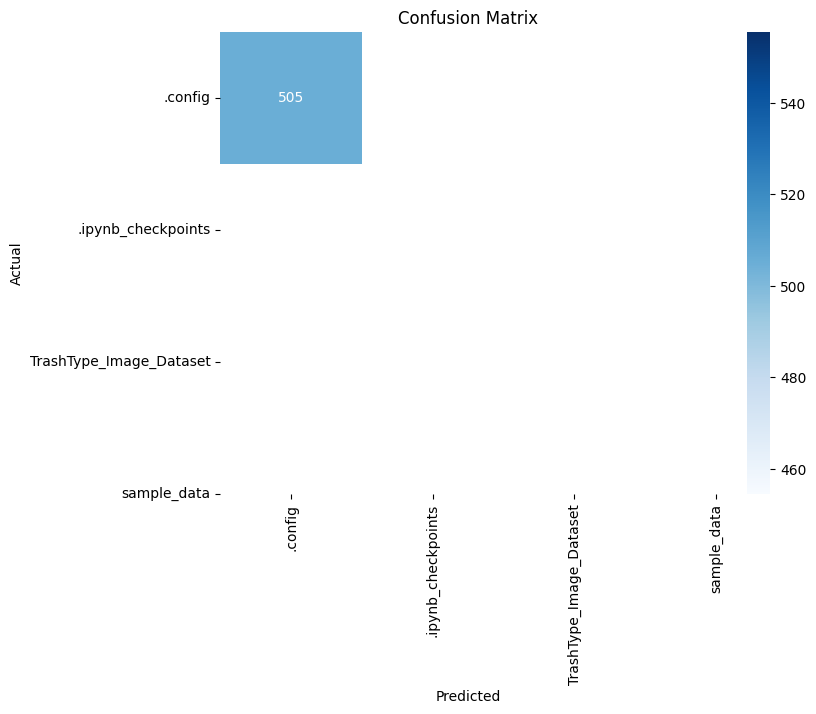

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

val_gen.reset()  # 🔧 Important

y_pred = model.predict(val_gen, verbose=1)
y_classes = np.argmax(y_pred, axis=1)
true_classes = val_gen.classes
labels = list(val_gen.class_indices.keys())

print("Predicted shape:", y_pred.shape)
print("True labels shape:", true_classes.shape)
print("Unique predicted classes:", np.unique(y_classes))

# 🧾 Classification Report
print("\nClassification Report:")
print(classification_report(
    true_classes,
    y_classes,
    labels=sorted(np.unique(true_classes)),
    target_names=labels
))

# 🔍 Confusion Matrix
cm = confusion_matrix(true_classes, y_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
